In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
from scipy import signal
%matplotlib inline

In [4]:
# Import data
train_csv = pd.read_csv("data/train.csv")

In [5]:
print("There are {:,} unique bird species in the dataset.".format(len(train_csv['species'].unique())))

There are 264 unique bird species in the dataset.


In [22]:
# Audio data loading
path = "data/train_audio/"

directory_contents = os.listdir(path)
directory_contents.sort()

train_data = []
train_labels = []
for i in range(3):
    curr_bird_dir = path + directory_contents[i] + "/"
    recording_names = os.listdir(curr_bird_dir)
    for filename in recording_names:
        sample, sr = librosa.load(curr_bird_dir+filename)
        # pass through fourier transform
        f, t, spec = signal.stft(sample, sr)
        print(spec.shape)
        train_data.append(spec)
        train_labels += [i]

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


(129, 10139)


/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


(129, 917)


/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


(129, 3471)


/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


(129, 3754)


/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


(129, 5819)


/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


KeyboardInterrupt: 

In [19]:
train_data_yeet = np.asarray(train_data)
train_labels = np.asarray(train_labels)

ValueError: could not broadcast input array from shape (129,10139) into shape (129)

In [20]:
print(train_labels.shape())
print(train_data_yeet.shape())

AttributeError: 'list' object has no attribute 'shape'

In [6]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# Map 1 library
import plotly.express as px

# Map 2 libraries
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Librosa Libraries
import librosa
import librosa.display
import IPython.display as ipd

import sklearn

import warnings
warnings.filterwarnings('ignore')


In [7]:
# Import data
train_csv = pd.read_csv("data/train.csv")
test_csv = pd.read_csv("data/test.csv")

# Create some time features
train_csv['year'] = train_csv['date'].apply(lambda x: x.split('-')[0])
train_csv['month'] = train_csv['date'].apply(lambda x: x.split('-')[1])
train_csv['day_of_month'] = train_csv['date'].apply(lambda x: x.split('-')[2])

print("There are {:,} unique bird species in the dataset.".format(len(train_csv['species'].unique())))

There are 264 unique bird species in the dataset.


In [8]:
train_csv.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,author,primary_label,longitude,length,time,recordist,license,year,month,day_of_month
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0,2013,05,25
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2013,05,27
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,...,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2013,05,27
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,...,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2013,05,27
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,...,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2013,05,27


In [9]:
test_csv.head()

,site,row_id,seconds,audio_id
0,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_5,5,0a997dff022e3ad9744d4e7bbf923288
1,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_10,10,0a997dff022e3ad9744d4e7bbf923288
2,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_15,15,0a997dff022e3ad9744d4e7bbf923288


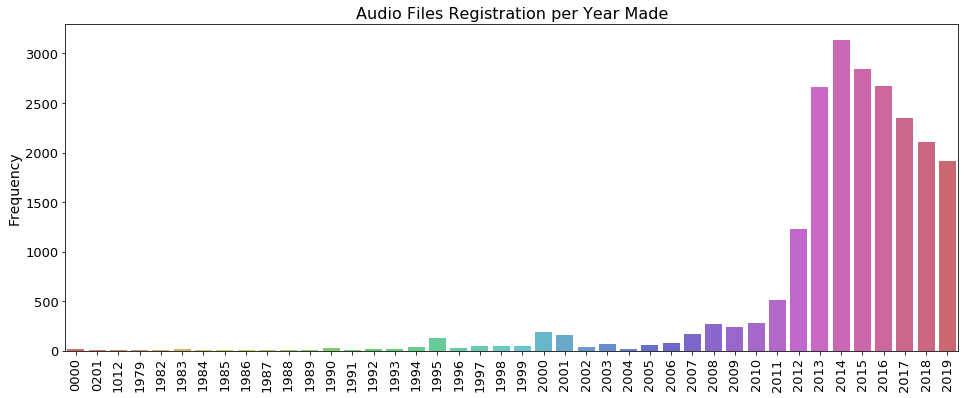

In [10]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(train_csv['year'], palette="hls")

plt.title("Audio Files Registration per Year Made", fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("");

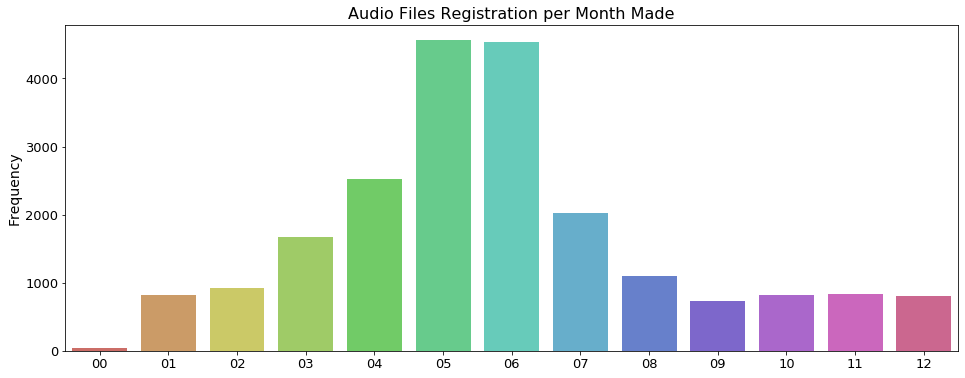

In [11]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(train_csv['month'], palette="hls")

plt.title("Audio Files Registration per Month Made", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("");

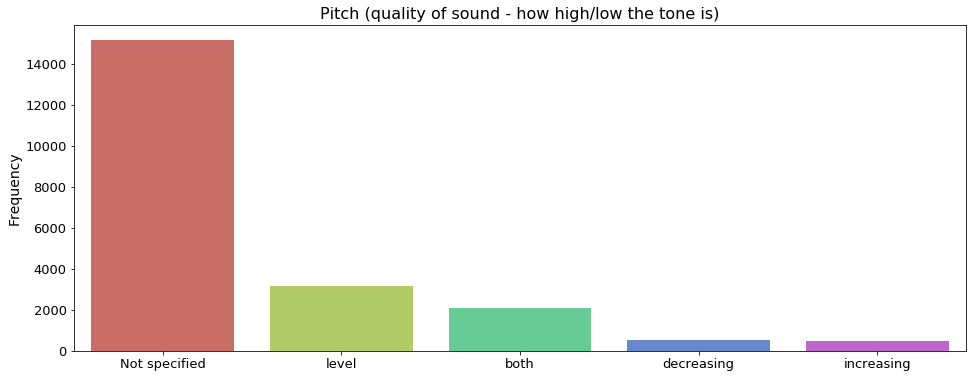

In [12]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(train_csv['pitch'], palette="hls", order = train_csv['pitch'].value_counts().index)

plt.title("Pitch (quality of sound - how high/low the tone is)", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("");

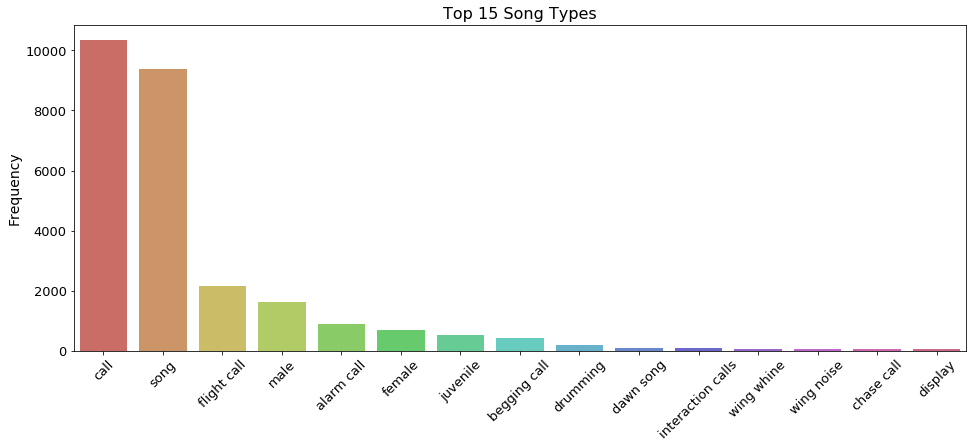

In [14]:
# Create a new variable type by exploding all the values
adjusted_type = train_csv['type'].apply(lambda x: x.split(',')).reset_index().explode("type")

# Strip of white spaces and convert to lower chars
adjusted_type = adjusted_type['type'].apply(lambda x: x.strip().lower()).reset_index()
adjusted_type['type'] = adjusted_type['type'].replace('calls', 'call')

# Create Top 15 list with song types
top_15 = list(adjusted_type['type'].value_counts().head(15).reset_index()['index'])
data = adjusted_type[adjusted_type['type'].isin(top_15)]

# === PLOT ===

plt.figure(figsize=(16, 6))
ax = sns.countplot(data['type'], palette="hls", order = data['type'].value_counts().index)

plt.title("Top 15 Song Types", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("");

In [ ]:
# Top 15 most common elevations
top_15 = list(train_csv['country'].value_counts().head(15).reset_index()['index'])
data = train_csv[train_csv['country'].isin(top_15)]

# === PLOT ===
plt.figure(figsize=(16, 6))
ax = sns.countplot(data['country'], palette='hls', order = data['country'].value_counts().index)
ax.add_artist(ab)

plt.title("Top 15 Countries with most Recordings", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("");